In [6]:
%config StoreMagics.autorestore = True
%reset -f
# %store -z
%store -r
%whos

Variable           Type              Data/Info
----------------------------------------------
Tsam               float             0.5
extMathcalP        LinearIOSystem    <LinearIOSystem>: sys[38]<...> [0. 0.]\n     [0. 0.]]\n
fullOrder          int               50
mathcalC           LinearIOSystem    <LinearIOSystem>: sys[82]<...>6 18. ]]\n\nD = [[1.4]]\n
mathcalP_cbmodel   LinearIOSystem    <LinearIOSystem>: sys[2]\<...>[[0. 0.]\n     [0. 0.]]\n
overlineMathcalC   StateSpace        A = [[-7.747e-17 -7.235e-<...>D = [[1.4]]\n\ndt = 0.5\n
reducOrder         int               25
truncExtMathcalP   LinearIOSystem    <LinearIOSystem>: sys[39]<...> [0. 0.]\n     [0. 0.]]\n


In [7]:
import numpy
import sympy
import scipy
import control
import matplotlib.pyplot as plt

from custom_utils import ControlUtils
from custom_utils import ODEUtils

from IPython.display import display
from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML

numpy.set_printoptions(precision=3)
sympy.init_printing(use_latex='mathjax', use_unicode=True)
sympy.init_printing()
plt.rcParams.update({ "text.usetex": True, "font.family": "Helvetica", "axes.titley": 1.0 } )
%matplotlib inline

<IPython.core.display.Math object>

<IPython.core.display.Math object>

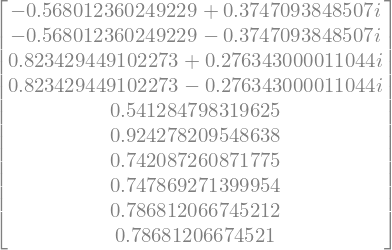

In [8]:
# Set system parameters
inputs = 1
outputs = 1
order = 10

# Sampling time and simulation integration step
Tsam = 0.3

# Generate random state space system
mathcalC = control.rss( order, outputs, inputs )
tf_MathcalC = control.ss2tf(mathcalC)
normInf_MathcalC = numpy.array([numpy.abs(mathcalC(1.0j*w)) for w in numpy.logspace(1,5,1500)]).max()
xc0 = numpy.zeros((order,1))

# Obtain exact discretization
overlineMathcalC = control.sample_system(mathcalC, Tsam, 'zoh')
tf_overlineMathcalC = control.ss2tf(overlineMathcalC)

# Linear system
# display(Math('\\mathcal{C} = '), mathcalC)
display(Math('\\lVert \\mathcal{C} \\rVert_{\\infty} = '), normInf_MathcalC)
# display(Math('\\overline{\\mathcal{C}} = '), overlineMathcalC)
display(Math('eigs(\\overline{A_c}) = '), sympy.Matrix(numpy.linalg.eigvals(overlineMathcalC.A)))

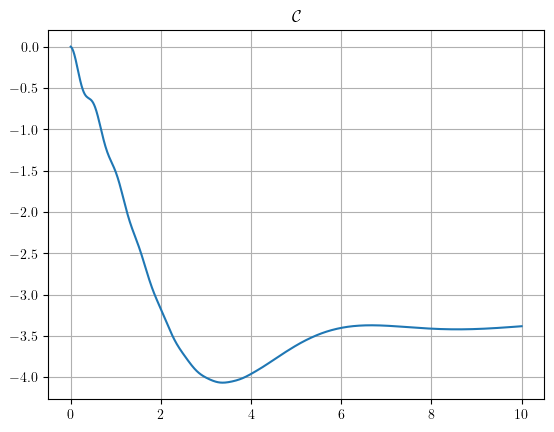

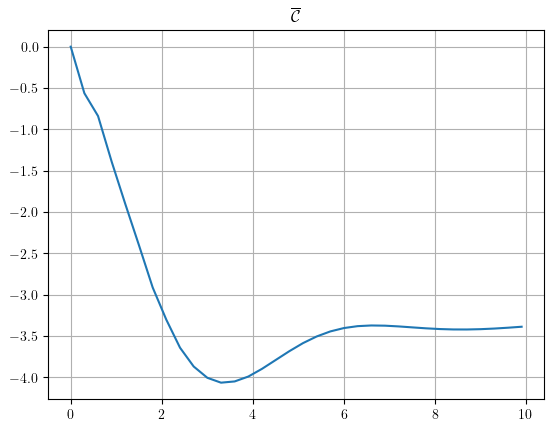

In [9]:
# Plot step response
t0 = 0
t1 = 10
steps = 1000

# Continuous-time system
tVec = numpy.linspace(t0,t1,steps)
resMathcalC = control.step_response(mathcalC, T=tVec)
plt.plot(resMathcalC.t, resMathcalC.outputs.T)
plt.title('$\\mathcal{C}$')
plt.grid()
plt.show()

# Discrete-time system (input:0, output:0)
tVedDis = numpy.arange(t0,t1,Tsam)
resOverlineMathcalC = control.step_response(overlineMathcalC, T=tVedDis)
plt.plot(resOverlineMathcalC.t, resOverlineMathcalC.outputs.T)
plt.title('$\\overline{\\mathcal{C}}$')
plt.grid()
plt.show()

In [10]:
%store -d mathcalC overlineMathcalC Tsam
%store mathcalC overlineMathcalC Tsam

Stored 'mathcalC' (LinearIOSystem)
Stored 'overlineMathcalC' (StateSpace)
Stored 'Tsam' (float)
